# Periodic Signals

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Relation between Spectrum and Fourier Series

The Fourier transform $X(j \omega) = \mathcal{F} \{ x(t) \}$ of a periodic signal $x(t)$, [as derived before](spectrum.ipynb#Fourier-Transform), is a line spectrum. It consists of a weighted series of Dirac impulses. Periodic functions can be represented alternatively by a [Fourier series](https://en.wikipedia.org/wiki/Fourier_series). The relation between the spectrum $X(j \omega)$ of a periodic signal and its Fourier series coefficients is derived in the following.

The complex Fourier series of a periodic signal $x(t)$ is defined as

\begin{equation}
x(t) = \sum_{n = - \infty}^{\infty} X_n \, e^{j n \frac{2 \pi}{T_\text{p}} t}
\end{equation}

where $T_\text{p} > 0$ denotes the period of the signal and $X_n$ the Fourier series coefficients of $x(t)$. The Fourier series represents the signal as weighted superposition of complex exponential signals. The weights (expansion coefficients) $X_n$ are given as

\begin{equation}
X_n = \frac{1}{T_\text{p}} \int_{0}^{T_\text{p}} x(t) \, e^{- j n \frac{2 \pi}{T_\text{p}} t} \; dt
\end{equation}

Introducing the [Fourier transform $X(j \omega)$ of a periodic signal](spectrum.ipynb#Fourier-Transform) into the [inverse Fourier transform](../fourier_transform/definition.ipynb#Definition) yields

\begin{align}
x(t) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} X_0(j \omega) \cdot {\bot \!\! \bot \!\! \bot} \left( \frac{\omega T_\text{p}}{2 \pi} \right) \, e^{j \omega t} \; d \omega \\
&= \frac{1}{T_\text{p}} \sum_{\mu = -\infty}^{\infty} X_0 \left( j \, \mu \frac{2 \pi}{T_\text{p}} \right) \, e^{j \, \mu \frac{2 \pi}{T_\text{p}} t}
\end{align}

where $X_0(j \omega) = \mathcal{F} \{ x_0(t) \}$ denotes the Fourier transform of one period $x_0(t)$ of the periodic signal. Note, the [definition of the Dirac comb](spectrum.ipynb#The-Dirac-Comb) and the multiplication property of the Dirac impulse was used to derive the last equality. Comparing this result with the definition of the Fourier series reveals that both are equal for

\begin{equation}
X_n = X_0 \left( j \, n \frac{2 \pi}{T_\text{p}} \right)
\end{equation}

The Fourier series coefficients $X_n$ of a periodic signal are equal to the Fourier transform $X_0(j \omega)$ of one period of the signal at the frequencies $\omega = n \frac{2 \pi}{T_\text{p}}$.

**Example**

The Fourier series coefficients of the pulse train can be derived from the [Fourier transform of the pulse train](spectrum.ipynb#Fourier-Transform-of-the-Pulse-Train) as

\begin{equation}
X_n = T \, e^{-j \omega \frac{T}{2}} \cdot \text{sinc} \left( \frac{\omega T}{2} \right) \bigg\vert_{\omega = n \frac{2 \pi}{T_\text{p}}} = T \, e^{-j n \pi \frac{T}{T_\text{p}}} \cdot \text{sinc} \left( n \pi \frac{T}{T_\text{p}} \right)
\end{equation}

With these coefficients the pulse train can be represented by the Fourier series

\begin{equation}
x(t) = \sum_{n = -\infty}^{\infty} T \, e^{-j n \pi \frac{T}{T_\text{p}}} \cdot \text{sinc} \left( n \pi \frac{T}{T_\text{p}} \right) \, e^{j n \frac{2 \pi}{T_\text{p}} t}
\end{equation}

This series cannot be evaluated numerically due to its infinite limits. The series has to be truncated to a finite number of summands in a practical implementation. The consequences of truncating the series are illustrated in the following. First the weights $X_n$ of the Fourier series are defined

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

n = sym.symbols('n', integer=True)
t = sym.symbols('t', real=True)

T = 2
Tp = 5

Xn = T * sym.exp(-sym.I * n * sym.pi * T/Tp) * sym.sinc(n * sym.pi * T/Tp)
Xn

Now the Fourier series is evaluated for a finite upper and lower limit $N$

\begin{equation}
x_N(t) = \sum_{n = -N}^{N} X_n \, e^{j n \frac{2 \pi}{T_\text{p}} t}
\end{equation}

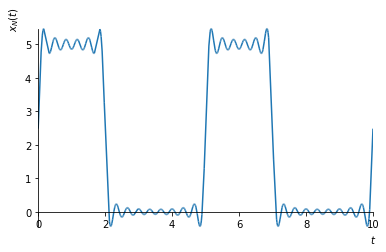

In [2]:
N = 15

x = sym.Sum(Xn * sym.exp(sym.I*n*2*sym.pi/Tp*t), (n, -N, N)).doit()
sym.plot(x, (t,0,10), xlabel='$t$', ylabel='$x_N(t)$');

Overshoots can be observed at the discontinuities of the pulse train. The relative magnitude of these overshoots remains at constantly 9% even when increasing the limits of the truncated Fourier series expansion. This effect is known as [*Gibbs phenomenon*](https://en.wikipedia.org/wiki/Gibbs_phenomenon). Truncated Fourier series are therefore not very well suited for the approximation of signals with discontinuities.

**Exercise**

* Examine the properties of the truncated Fourier series when you increase the limit $N$ in above example. Note: The evaluation of the Fourier series may take a while due to involved numerical complexity.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.